<!-- # Copyright (c) 2025 takotime808 -->
# Confidence Interval Plots for Single and Multi-Output Regression

This notebook demonstrates:
- How to visualize confidence intervals for regression predictions.
- How to use the provided `plot_multioutput_confidence_intervals` and `plot_confidence_interval` functions with both single and multi-output data.

---

### Imports ###


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from multioutreg.figures.confidence_intervals import (
    plot_confidence_interval,
    plot_multioutput_confidence_intervals,
    plot_regressormixin_confidence_intervals,
)

<!-- # Copyright (c) 2025 takotime808 -->

## 1. Multi-Output Example

Let's simulate a dataset with 3 targets, fit a RandomForest model, and plot confidence intervals.


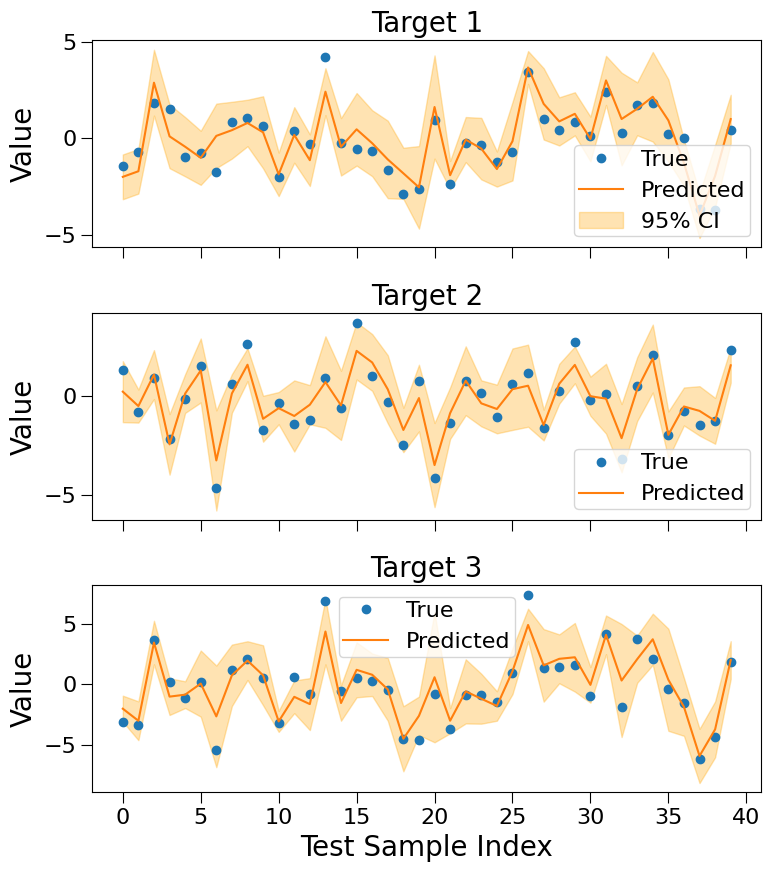

In [2]:
# Simulate multi-output data
n_samples = 200
n_features = 3
n_targets = 3
rng = np.random.RandomState(42)
X = rng.randn(n_samples, n_features)
Y = X @ rng.randn(n_features, n_targets) + rng.randn(n_samples, n_targets) * 0.5

plot_multioutput_confidence_intervals(X, Y, alpha=0.05,)


<!-- # Copyright (c) 2025 takotime808 -->

## 2. Single-Output Example

The same functions can be used for single-output regression.

- We'll extract the first target and treat it as a single-output case.
- We'll fit a RandomForest, calculate mean and std predictions, and plot the confidence interval.



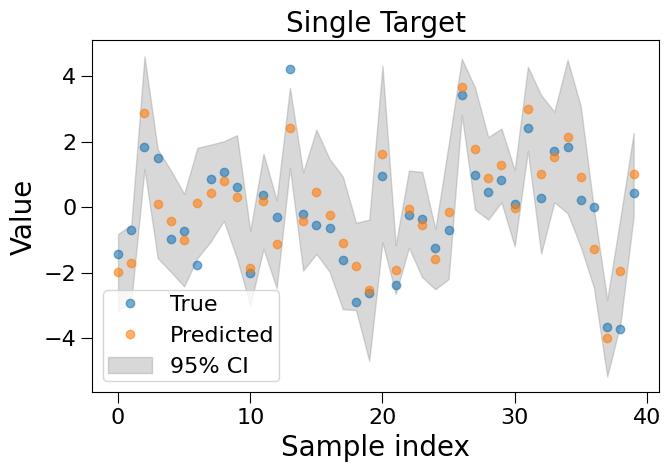

In [3]:
# Single-output: select first target only
y_single = Y[:, 0]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_single, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict using each tree for std estimate
tree_preds = np.array([tree.predict(X_test) for tree in model.estimators_])
preds = tree_preds.mean(axis=0)
std = tree_preds.std(axis=0)

# Use the plot_confidence_interval function
plot_confidence_interval(y_true=y_test, preds=preds, std=std, output_names=["Single Target"])


<!-- # Copyright (c) 2025 takotime808 -->

### Plotting With Errorbars Instead of CI Bands ###


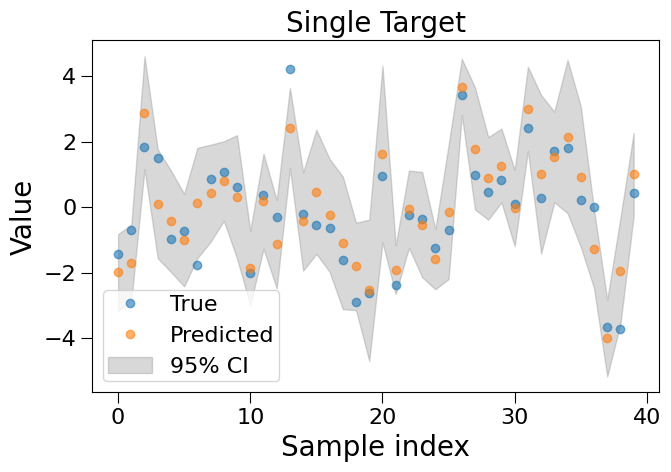

In [4]:
plot_confidence_interval(
    y_true=y_test,
    preds=preds,
    std=std,
    output_names=["Single Target"],
    plot_errorbars=False,
    plot_ci_band=True,
)


<!-- # Copyright (c) 2025 takotime808 -->

### Plotting With No Errorbars and No CI Bands ###


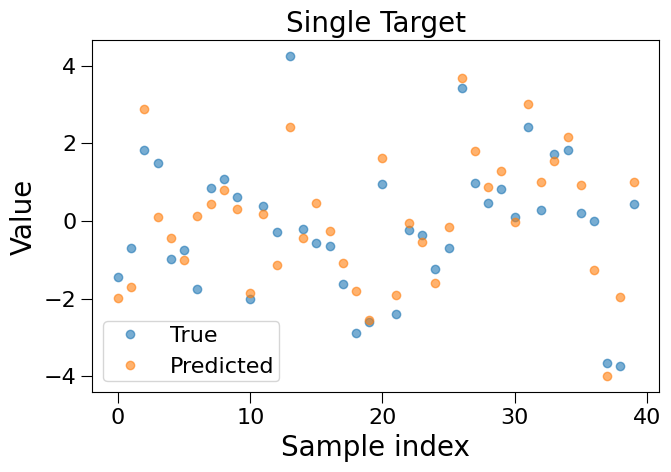

In [5]:
plot_confidence_interval(
    y_true=y_test,
    preds=preds,
    std=std,
    output_names=["Single Target"],
    plot_errorbars=False,
    plot_ci_band=False,
)


<!-- # Copyright (c) 2025 takotime808 -->
## 3. Multi-Output: Manual Use of plot_confidence_interval

You can also use `plot_confidence_interval` directly for multi-output problems.

Here’s how to do it:


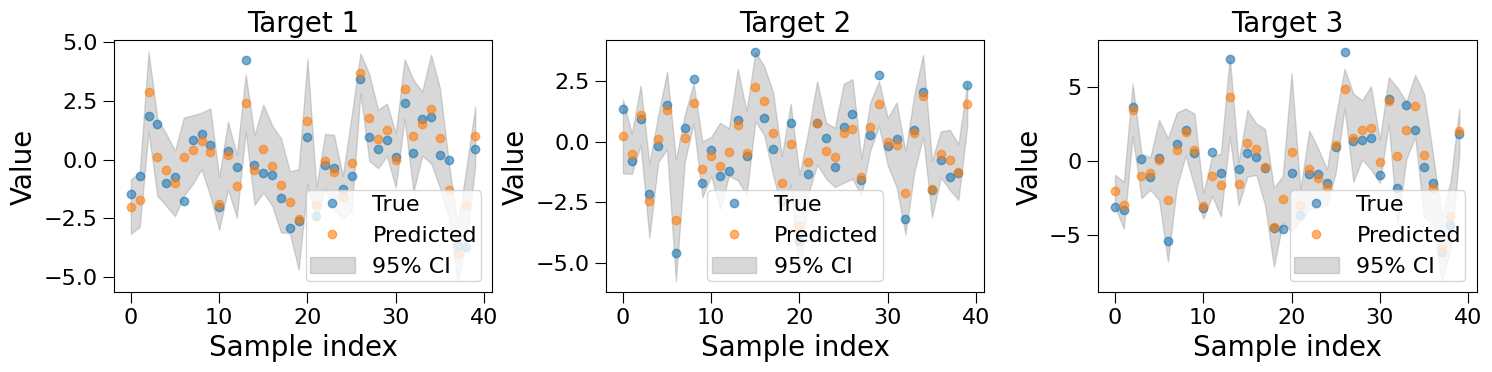

In [6]:
# Fit multi-output model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
mo_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
mo_model.fit(X_train, Y_train)

# Gather predictions and stds for each target
mo_means = []
mo_stds = []
for est in mo_model.estimators_:
    preds = np.array([tree.predict(X_test) for tree in est.estimators_])
    mo_means.append(preds.mean(axis=0))
    mo_stds.append(preds.std(axis=0))
mo_means = np.stack(mo_means, axis=1)
mo_stds = np.stack(mo_stds, axis=1)

plot_confidence_interval(
    y_true=Y_test,
    preds=mo_means,
    std=mo_stds,
    output_names=[f"Target {i+1}" for i in range(Y.shape[1])],
    plot_errorbars=False,
    plot_ci_band=True,
)


<!-- # Copyright (c) 2025 takotime808 -->

### Plotting With Errorbars Instead of CI Bands ###


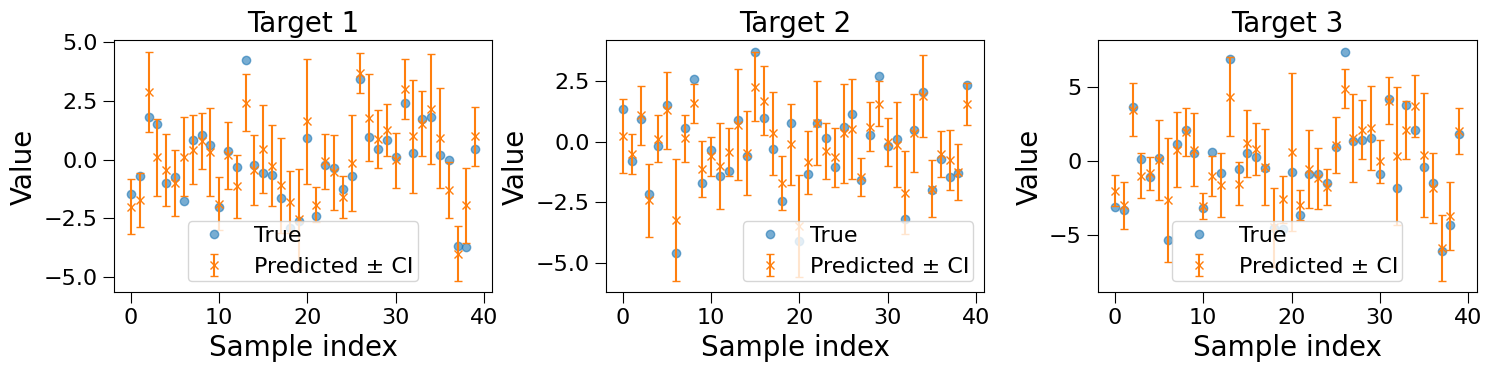

In [7]:
plot_confidence_interval(
    y_true=Y_test,
    preds=mo_means,
    std=mo_stds,
    output_names=[f"Target {i+1}" for i in range(Y.shape[1])],
    plot_errorbars=True,
    plot_ci_band=False,
)

<!-- # Copyright (c) 2025 takotime808 -->

### Plotting With No Errorbars and No CI Bands ###


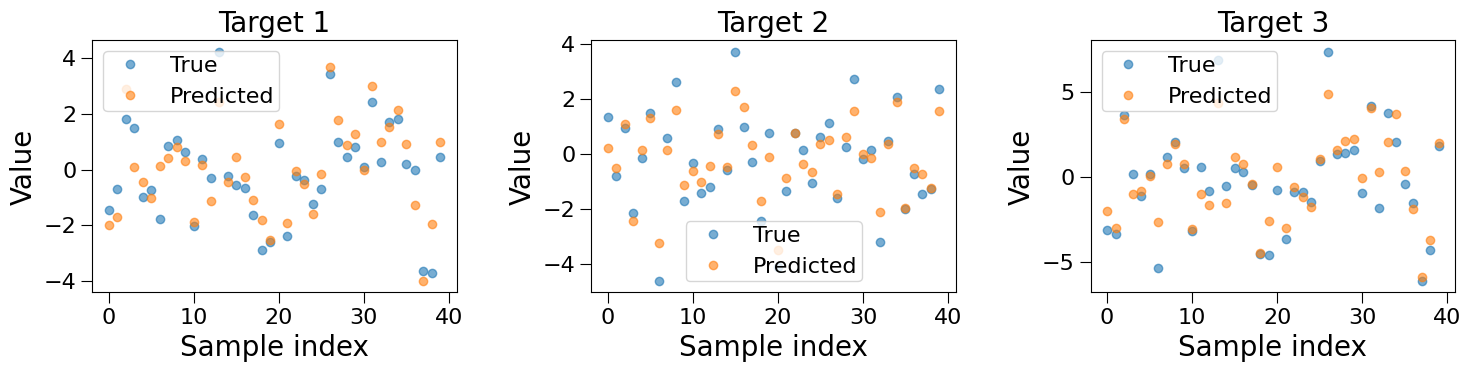

In [8]:
plot_confidence_interval(
    y_true=Y_test,
    preds=mo_means,
    std=mo_stds,
    output_names=[f"Target {i+1}" for i in range(Y.shape[1])],
    plot_errorbars=False,
    plot_ci_band=False,
)

<!-- # Copyright (c) 2025 takotime808 -->

## 3. Multi-Output: RegressorMixin

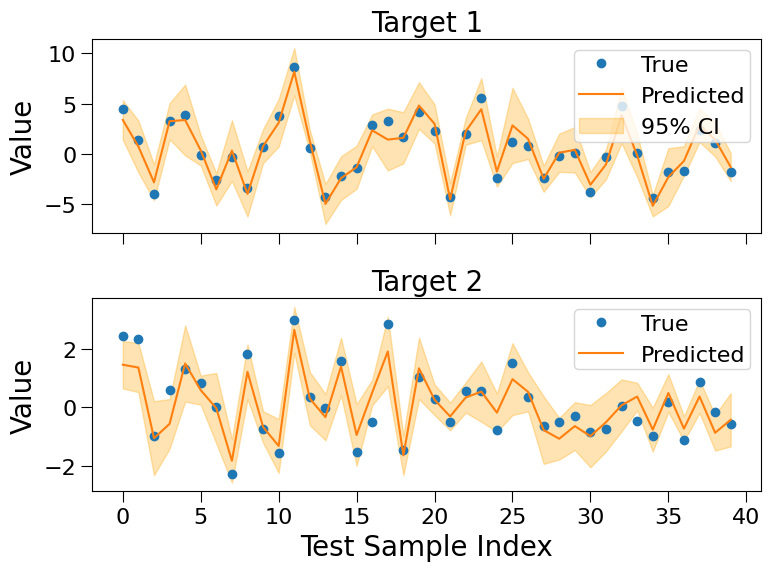

In [9]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# --- Simulate data ---
n_samples = 200
n_features = 3
n_targets = 2
rng = np.random.RandomState(0)

X = rng.randn(n_samples, n_features)
# Create 2 outputs, each a different noisy linear function of X
Y = np.stack([
    3*X[:, 0] - 2*X[:, 1] + rng.normal(0, 0.5, size=n_samples),
    -1*X[:, 1] + 0.5*X[:, 2] + rng.normal(0, 0.4, size=n_samples)
], axis=1)

# --- Use your plotting function ---
plot_regressormixin_confidence_intervals(
    X, Y, 
    alpha=0.05,  # 95% confidence interval
    base_estimator=RandomForestRegressor(n_estimators=100, random_state=0)
)

# If you want to save the figure instead of showing it, use:
# plot_regressormixin_confidence_intervals(X, Y, savefig='multioutput_example.png')


<!-- # Copyright (c) 2025 takotime808 -->

### Plotting With Errorbars Instead of CI Bands ###


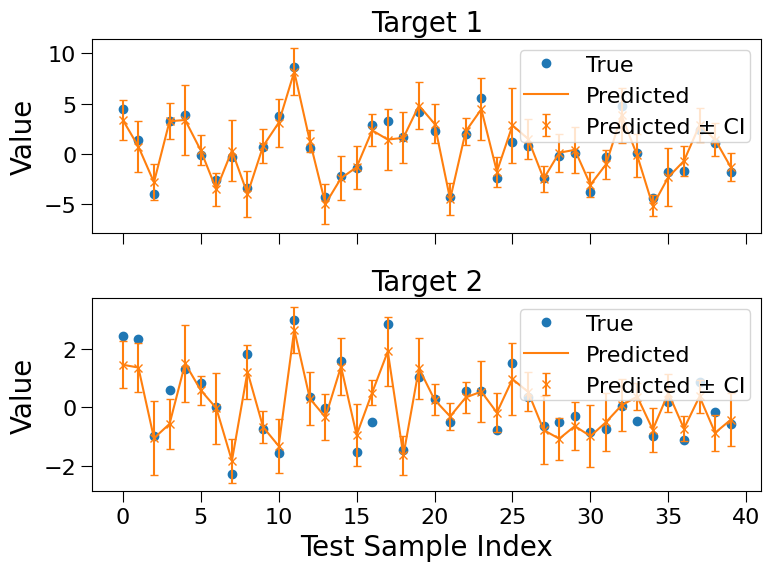

In [10]:
plot_regressormixin_confidence_intervals(
    X, Y, 
    alpha=0.05,  # 95% confidence interval
    base_estimator=RandomForestRegressor(n_estimators=100, random_state=0),
    plot_ci_band=False,
    plot_errorbars=True,
)

<!-- # Copyright (c) 2025 takotime808 -->

### Plotting With Errorbars and CI Bands ###

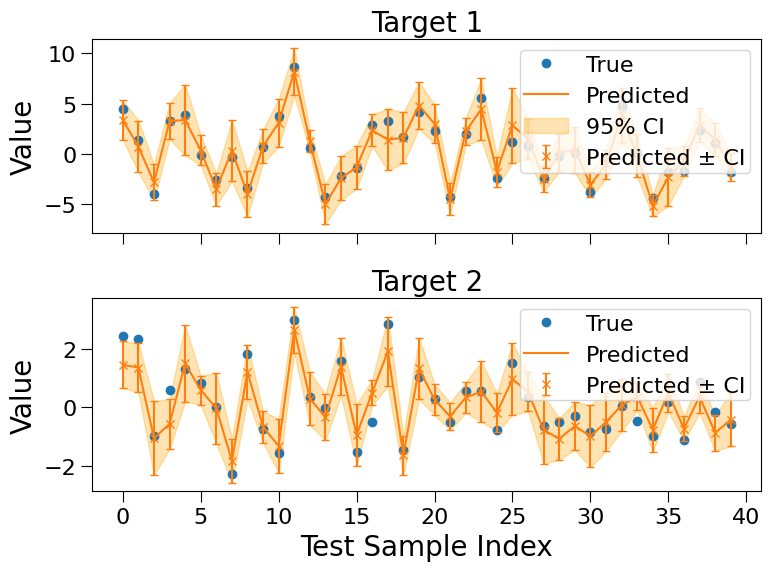

In [11]:
plot_regressormixin_confidence_intervals(
    X, Y, 
    alpha=0.05,  # 95% confidence interval
    base_estimator=RandomForestRegressor(n_estimators=100, random_state=0),
    plot_ci_band=True,
    plot_errorbars=True,
)

<!-- # Copyright (c) 2025 takotime808 -->

### Plotting With No Errorbars and No CI Bands ###


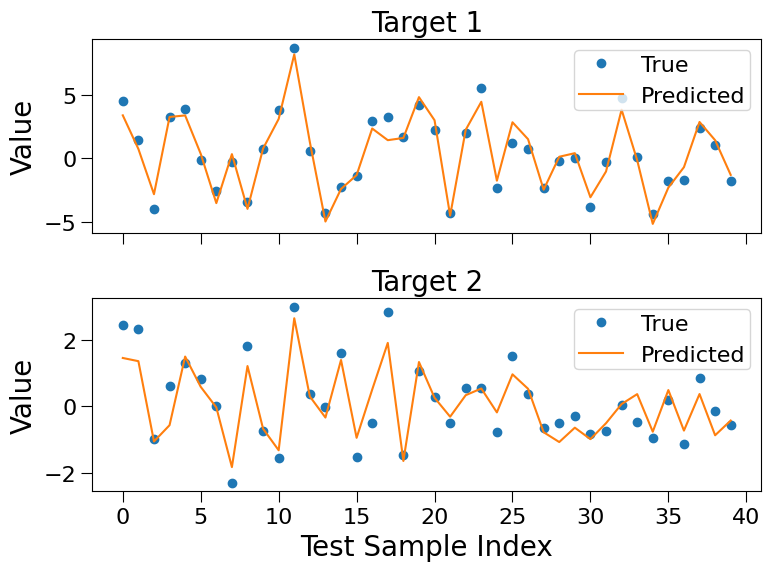

In [12]:
plot_regressormixin_confidence_intervals(
    X, Y, 
    alpha=0.05,  # 95% confidence interval
    base_estimator=RandomForestRegressor(n_estimators=100, random_state=0),
    plot_ci_band=False,
    plot_errorbars=False,
)

<!-- # Copyright (c) 2025 takotime808 -->

## Conclusion

- `plot_multioutput_confidence_intervals` quickly fits and visualizes confidence intervals for any number of targets.
- `plot_confidence_interval` is flexible for single or multi-output results (provided you have predicted mean and std).
- For real uncertainty, use models that output predictive distributions (e.g., Bayesian models, ensembles).

